# Pixelator

Create pixel art from any image!


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import json
%matplotlib inline

In [2]:
def calculate_square_color(square, palette):
    """Calculates the average red, green, and blue values of all pixels in a given square with size
    square side length x square side length.
    
    Args:
        square (numpy array) : array of shape (square side length, square side length, 3)
        palette (str) : color palette to which the image should be transformed. Can be "sweetie_16",
            "better16", "pico_8", or "aap_64". If any other value is passed, the average color of 
            all pixels in the square is used.
    
    Returns:
        RGB_new (list) : list of length 3 that contains a value for red, green, and blue. The RGB 
            values are either the average of all pixels in the square or the RGB code of the chosen
            palette with the smallest euclidean distance to the average.
    """
    # Store each r, g, b value for the square
    reds, blues, greens = [], [], []
    for row in square:
        for pixel in row:
            reds.append(pixel[0])
            greens.append(pixel[1])
            blues.append(pixel[2])
    
    # Calculate the average r, g, b values
    red_avg = int(sum(reds) / len(reds))
    green_avg = int(sum(greens) / len(greens))
    blue_avg = int(sum(blues) / len(blues))
    RGB_avg = [red_avg, green_avg, blue_avg]
    
    # Import the color palettes
    path = "./palettes"
    filename = "palettes.json"
    with open(os.path.join(path, filename), "r") as file:
        palettes = json.load(file)
    
    # Determine if a color palette has been selected. If yes, calculate the euclidean distance
    # between RGB_avg and all palette colors and pick the one with the smallest distance.
    palette_names = ["sweetie_16", "better16", "pico_8", "aap_64"]
    for palette_name in palette_names:
        if palette_name == palette:
            colors = palettes[palette_name]
            color_index = np.linalg.norm(np.array(RGB_avg) - np.array(colors), axis = 1).argmin()
            RGB_new = colors[color_index]
            break
        else:
            RGB_new = [red_avg, green_avg, blue_avg]
    
    return RGB_new

In [3]:
def pixelator(img_path, pixel_size, palette):
    """Transforms an image to a pixelated version of itself (i.e., creates pixel art).
    
    Args:
        img_path (str) : path to the image to be transformed.
        pixel_size (int) : size of the pixels in the output image. Determines the side length of a
            square of pixels in the input image that is unified (i.e., given one color).
        palette (str) : color palette to which the image should be transformed. Can be "sweetie_16",
            "better16", "pico_8", or "aap_64". If any other value is passed, the average color of 
            all pixels in the square is used.
    
    Returns:
        new_img (Image) : the pixelated output image.
    """
    # Open the image and convert it to a np array
    with Image.open(img_path) as img:
        img_array = np.asarray(img)
    
    # Obtain height and width of the original image
    original_image_height, original_image_width, _ = img_array.shape
    # Height and width of the resulting picture must be divisible by
    # output pixel size without remainder. Subtract the result of the
    # modulo operation on original height/width and create a new np
    # array of that shape.
    new_image_height = original_image_height - (original_image_height % pixel_size)
    new_image_width = original_image_width - (original_image_width % pixel_size)
    new_image = np.zeros((new_image_height, new_image_width, 3), dtype=np.uint8)

    # Iterate over the image in squares determined by pixel_size
    for i in range(0, new_image_height, pixel_size):
        for j in range(0, new_image_width, pixel_size):
            # Extract a square
            square = img_array[i:i + pixel_size, j:j + pixel_size]
            # Calculate the new color for the square
            RGB_new = calculate_square_color(square, palette)
            # Add a square in the color of RGB_new to the np array
            # for the new image
            new_image[i:i + pixel_size, j:j + pixel_size] = RGB_new
    
    # Convert the new image array to an image
    new_img = Image.fromarray(new_image)
    
    return new_img

Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image format: JPEG
Image size: (320, 175)
Image mode: RGB


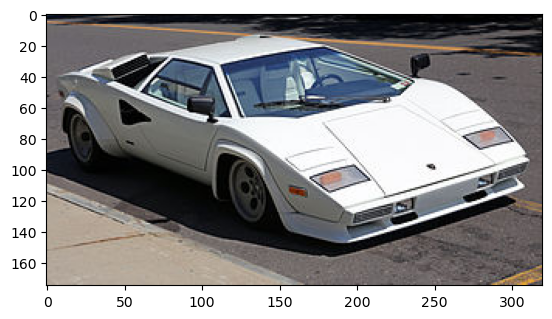

In [4]:
# Check source image
in_path = "./img"
in_filename = "lamborghini_small.jpg"

# Open and show image
img = Image.open(os.path.join(in_path, in_filename))
plt.imshow(img)

# Image details
print(f"Image type: {type(img)}")
print(f"Image format: {img.format}")
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")

# Close image manually
img.close()

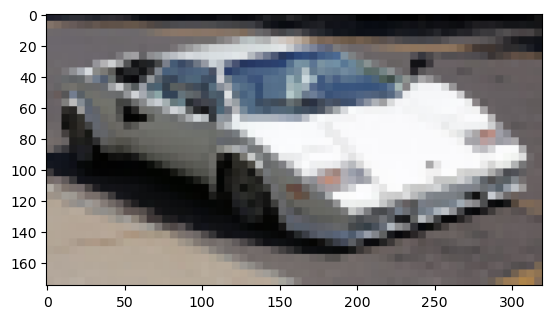

In [5]:
# Generate a pixelated image without using a palette
lamborghini_no_palette = pixelator(os.path.join(in_path, in_filename), 5, "")

# Show the pixelated image
plt.imshow(lamborghini_no_palette)

# Save the image
out_path = "./generated_images"
out_filename = "lamborghini_no_palette.jpg"
lamborghini_no_palette.save(os.path.join(out_path, out_filename))

In [6]:
# Create different images with the different palettes
lamborghini_sweetie_16 = pixelator(os.path.join(in_path, in_filename), 2, "sweetie_16")
lamborghini_better16 = pixelator(os.path.join(in_path, in_filename), 2, "better16")
lamborghini_pico_8 = pixelator(os.path.join(in_path, in_filename), 3, "pico_8")
lamborghini_aap_64 = pixelator(os.path.join(in_path, in_filename), 3, "aap_64")

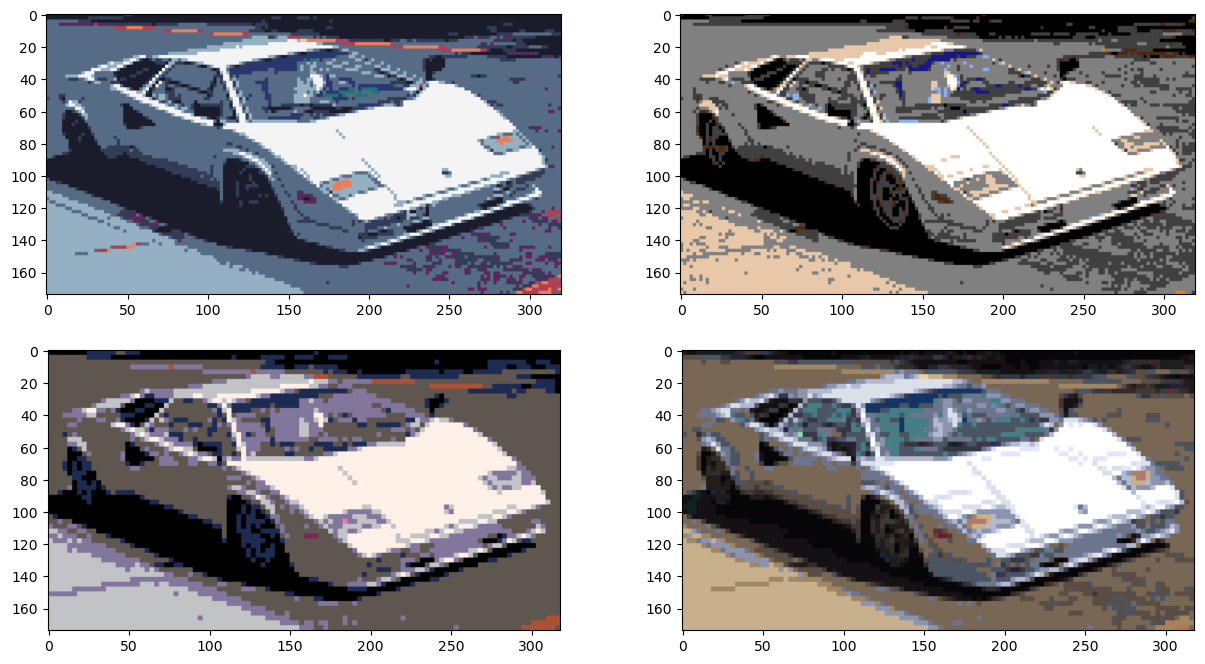

In [7]:
# Show the image with different palettes
fig, axarr = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(15)
axarr[0,0].imshow(lamborghini_sweetie_16)
axarr[0,1].imshow(lamborghini_better16)
axarr[1,0].imshow(lamborghini_pico_8)
axarr[1,1].imshow(lamborghini_aap_64)

**Image credit**

[1981 Lamborghini Countach LP400S (S2) front.jpg](https://commons.wikimedia.org/wiki/File:1981_Lamborghini_Countach_LP400S_(S2)_front.jpg) by [Mr.choppers](https://commons.wikimedia.org/wiki/User:Mr.choppers), used under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en) / Modified with Pixelator